Лабораторийн ажил гүйцэтгэсэн: B221960039- Т.Хулан

In [1]:
#хэрэгтэй сангуудаа суулгана
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

PArt1

In [2]:
 %matplotlib inline

In [41]:
# Граф унших функц
def read_net(filename):
    g = nx.Graph()  # Шинэ граф үүсгэх
    with open(filename) as f:
        f.readline()  # Эхний мөрийг алгасах (header хэсгийг үл тоох)
        for l in f:
            l = l.strip().split(",")  # Мөрийг задлах
            g.add_edge(l[0], l[1])  # Холбоос нэмэх
    return g

# Game of Thrones 6-р улирлын өгөгдөл унших
season = 6
g = read_net('/content/drive/MyDrive/got-s6-edges.csv')

# Дүрүүдийг графт нэмэх ба гэр бүлийн харьяалал оруулах
houses = {}
with open('/content/drive/MyDrive/got-s6-nodes.csv') as f:
    f.readline()  # Header мөрийг алгасах
    for l in f:
        node, _, house = l.rstrip().split(",")
        g.add_node(node, house=house)  # Дүр болон гэр бүлийн мэдээллийг нэмэх

# Графын байршлыг тооцоолох
pos = nx.spring_layout(g)

In [40]:
#Google Drive-тай холбох
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Жижиг графуудыг дүрслэхэд зориулсан туслах функц
def draw_net(G, pos, measures, measure_name):
    """
    Графыг (networkx) дүрслэх функц.
    Зангилаануудыг (nodes) тодорхой хэмжүүрээр будна.

    G - networkx граф
    pos - зангилааны байрлал
    measures - хэмжүүрийн утгууд (dictionary хэлбэртэй)
    measure_name - Графын гарчиг
    """

    plt.figure(figsize=(20, 20))  # Дүрслэлийн зургийн хэмжээ 20x20 инч

    # Зангилаануудыг (nodes) дүрслэх
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),  # Зангилааны өнгө (measures утга дээр суурилсан)
                                   nodelist=measures.keys())  # Графын бүх зангилааг авах

    # Өнгөний масштабын тохиргоо
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    # Зангилааны шошго (нэр) нэмэх
    labels = nx.draw_networkx_labels(G, pos)

    # Графын ирмэгүүдийг (edges) нэмэх
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)  # Ил тод байдлыг 0.2 болгож харагдах байдлыг сайжруулах

    # Графын гарчиг нэмэх
    plt.title(measure_name)

    # Өнгөний тайлбар (colorbar) нэмэх
    plt.colorbar(nodes)

    # Тэнхлэгийг нуух
    plt.axis('off')

    # Графыг харуулах
    plt.show()

In [7]:
degrees = dict(g.degree()) # # Графын бүх зангилааны зэрэг (degree)-ийн dictionary үүсгэх

In [43]:
# Зангилаануудыг зэрэг (degree) дээр үндэслэн ихээс бага руу эрэмбэлэх
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5] # Топ 5 хамгийн их холбогдсон зангилаануудыг харуулах

[('SANSA', 40), ('JON', 31), ('CERSEI', 27), ('TYRION', 26), ('JAIME', 24)]

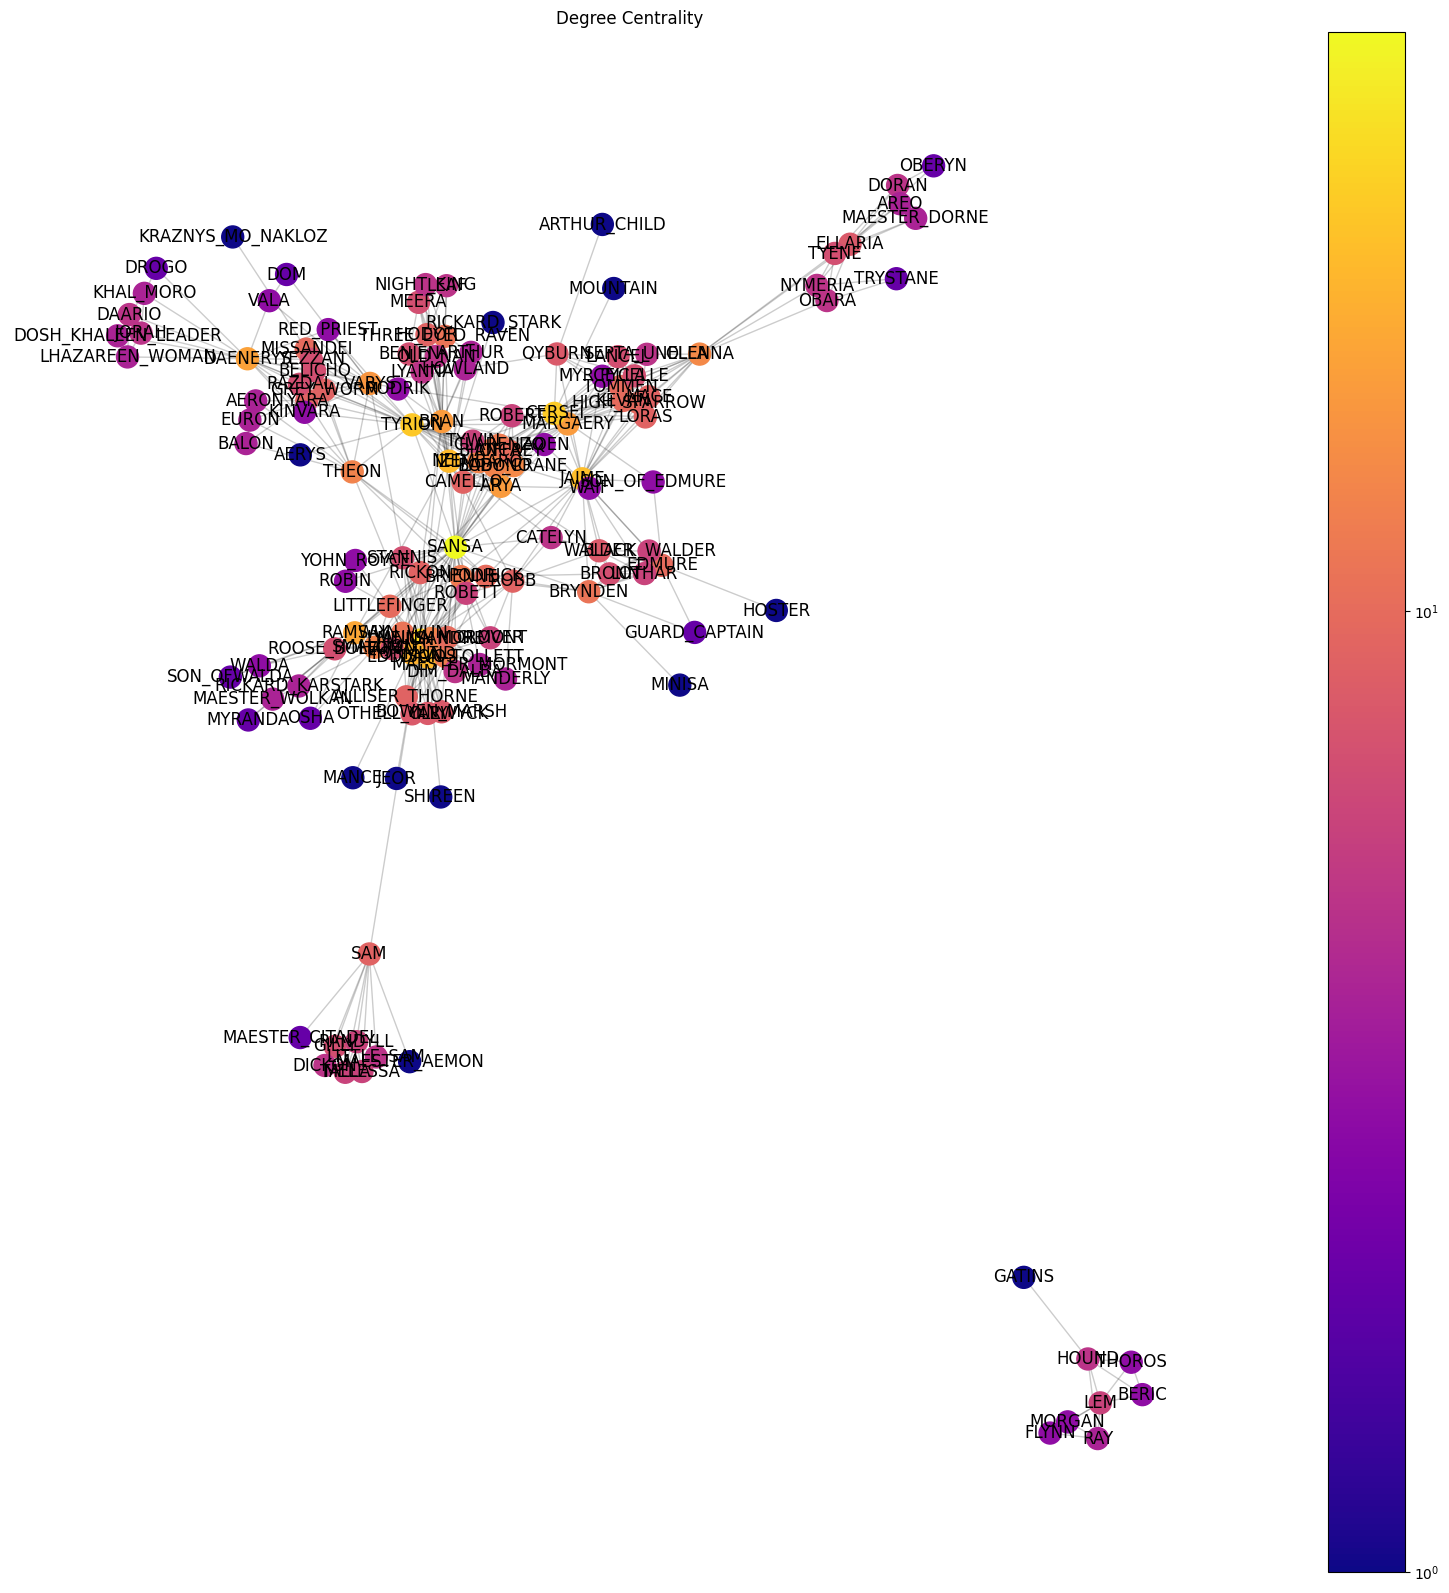

In [9]:
draw_net(g, pos, degrees, 'Degree Centrality') #Графыг дүрслэх `draw_net` функцийг дуудах

In [10]:
closeness = nx.closeness_centrality(g) # бүх зангилааны төвлөрсөн ойр байдлыг тооцоолох

In [11]:
#Closeness Centrality хэмжүүр дээр үндэслэн зангилаануудыг бууруулан эрэмбэлэх
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.48437799501629286),
 ('TYRION', 0.4296366462644516),
 ('JON', 0.4238307456392563),
 ('CERSEI', 0.4181796690307329),
 ('JAIME', 0.4140392762680523)]

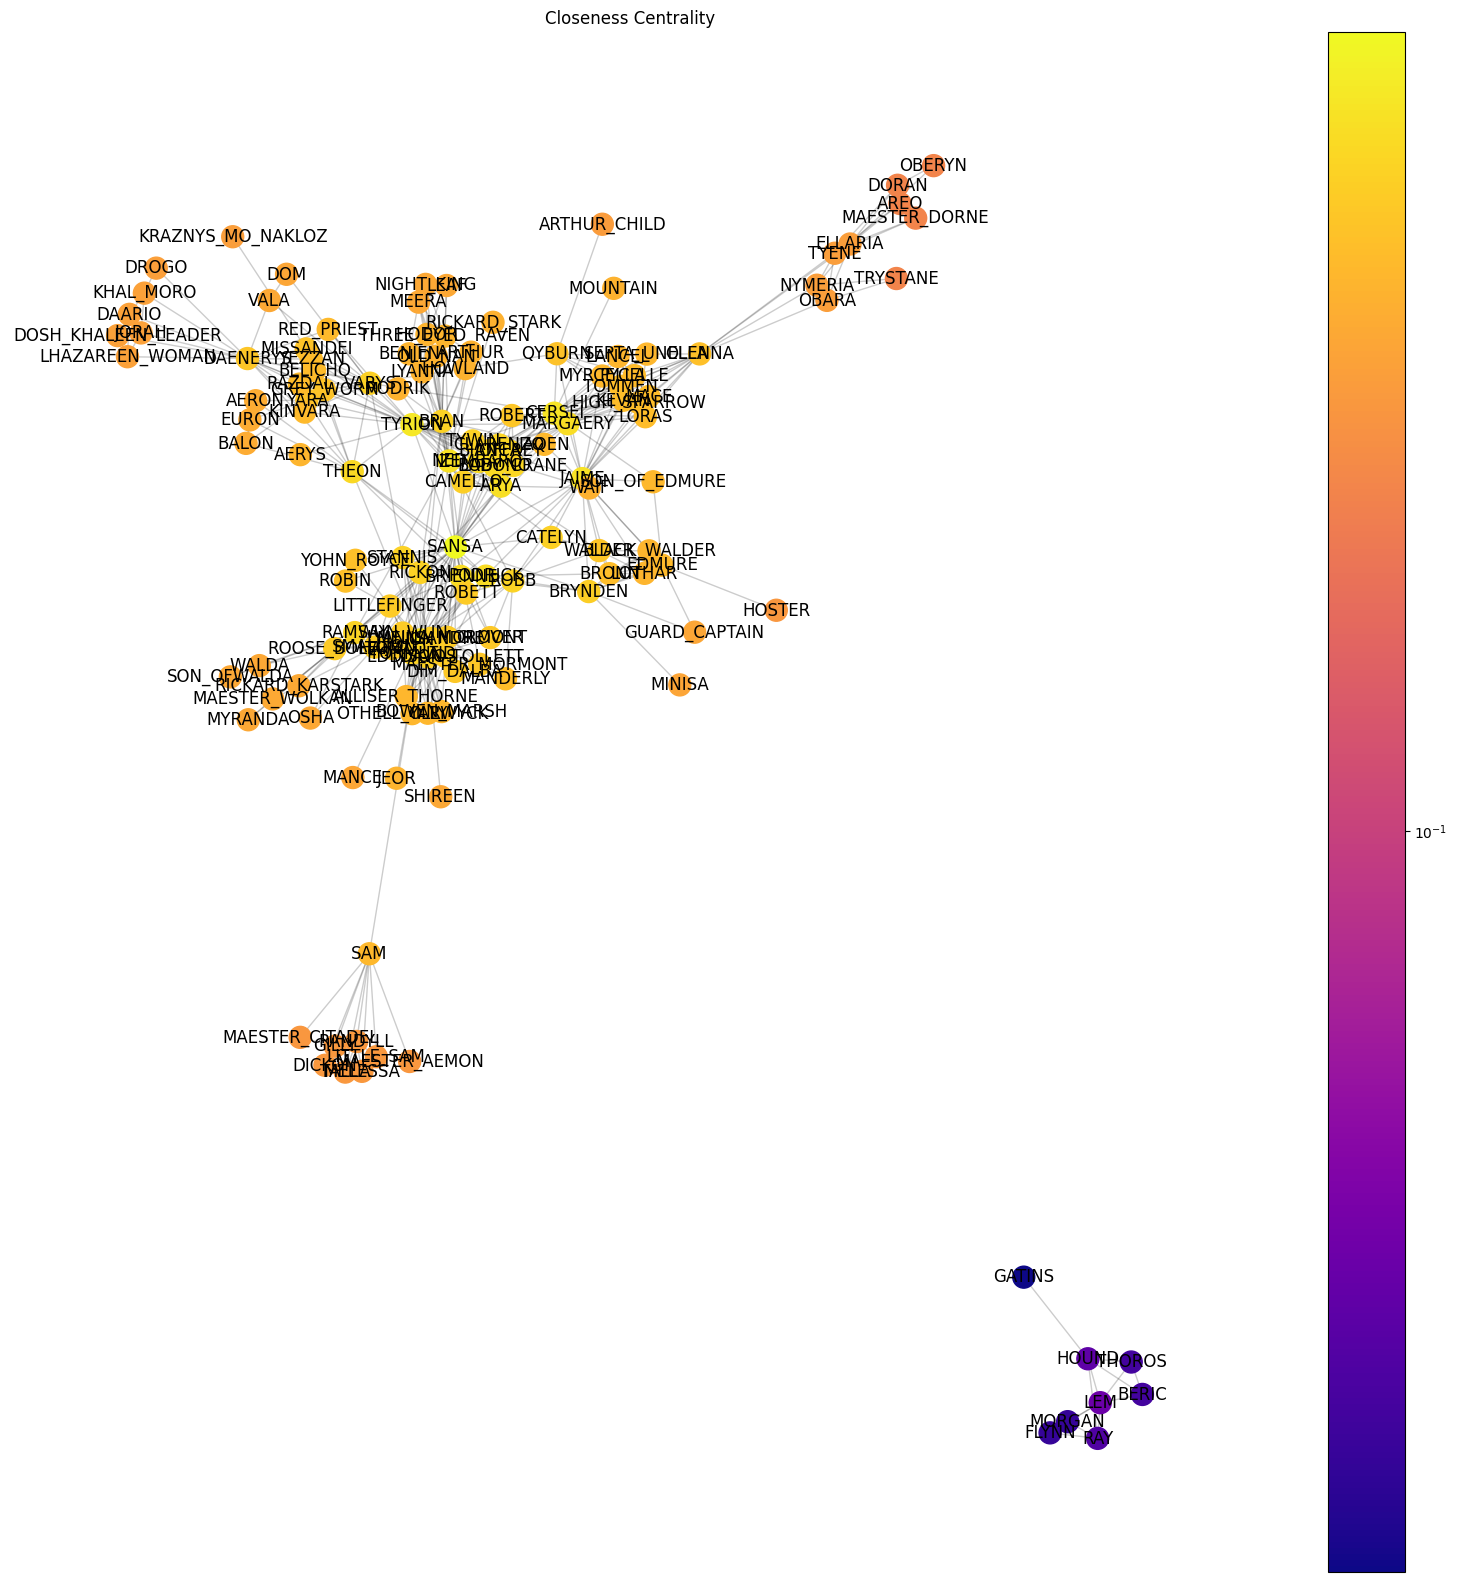

In [12]:
draw_net(g, pos, closeness, 'Closeness Centrality') #Closeness дүрслэх `draw_net` функцийг дуудах

In [13]:
betweenness = nx.betweenness_centrality(g) # бүх зангилааны хоорондох төвлөрсөн байдлыг тооцоолох

In [14]:
#betweenness хэмжүүр дээр үндэслэн зангилаануудыг бууруулан эрэмбэлэх
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.2626236959730493),
 ('JON', 0.19134542283724257),
 ('TYRION', 0.14853156113828941),
 ('JAIME', 0.13044955131298),
 ('CERSEI', 0.11721858119776944)]

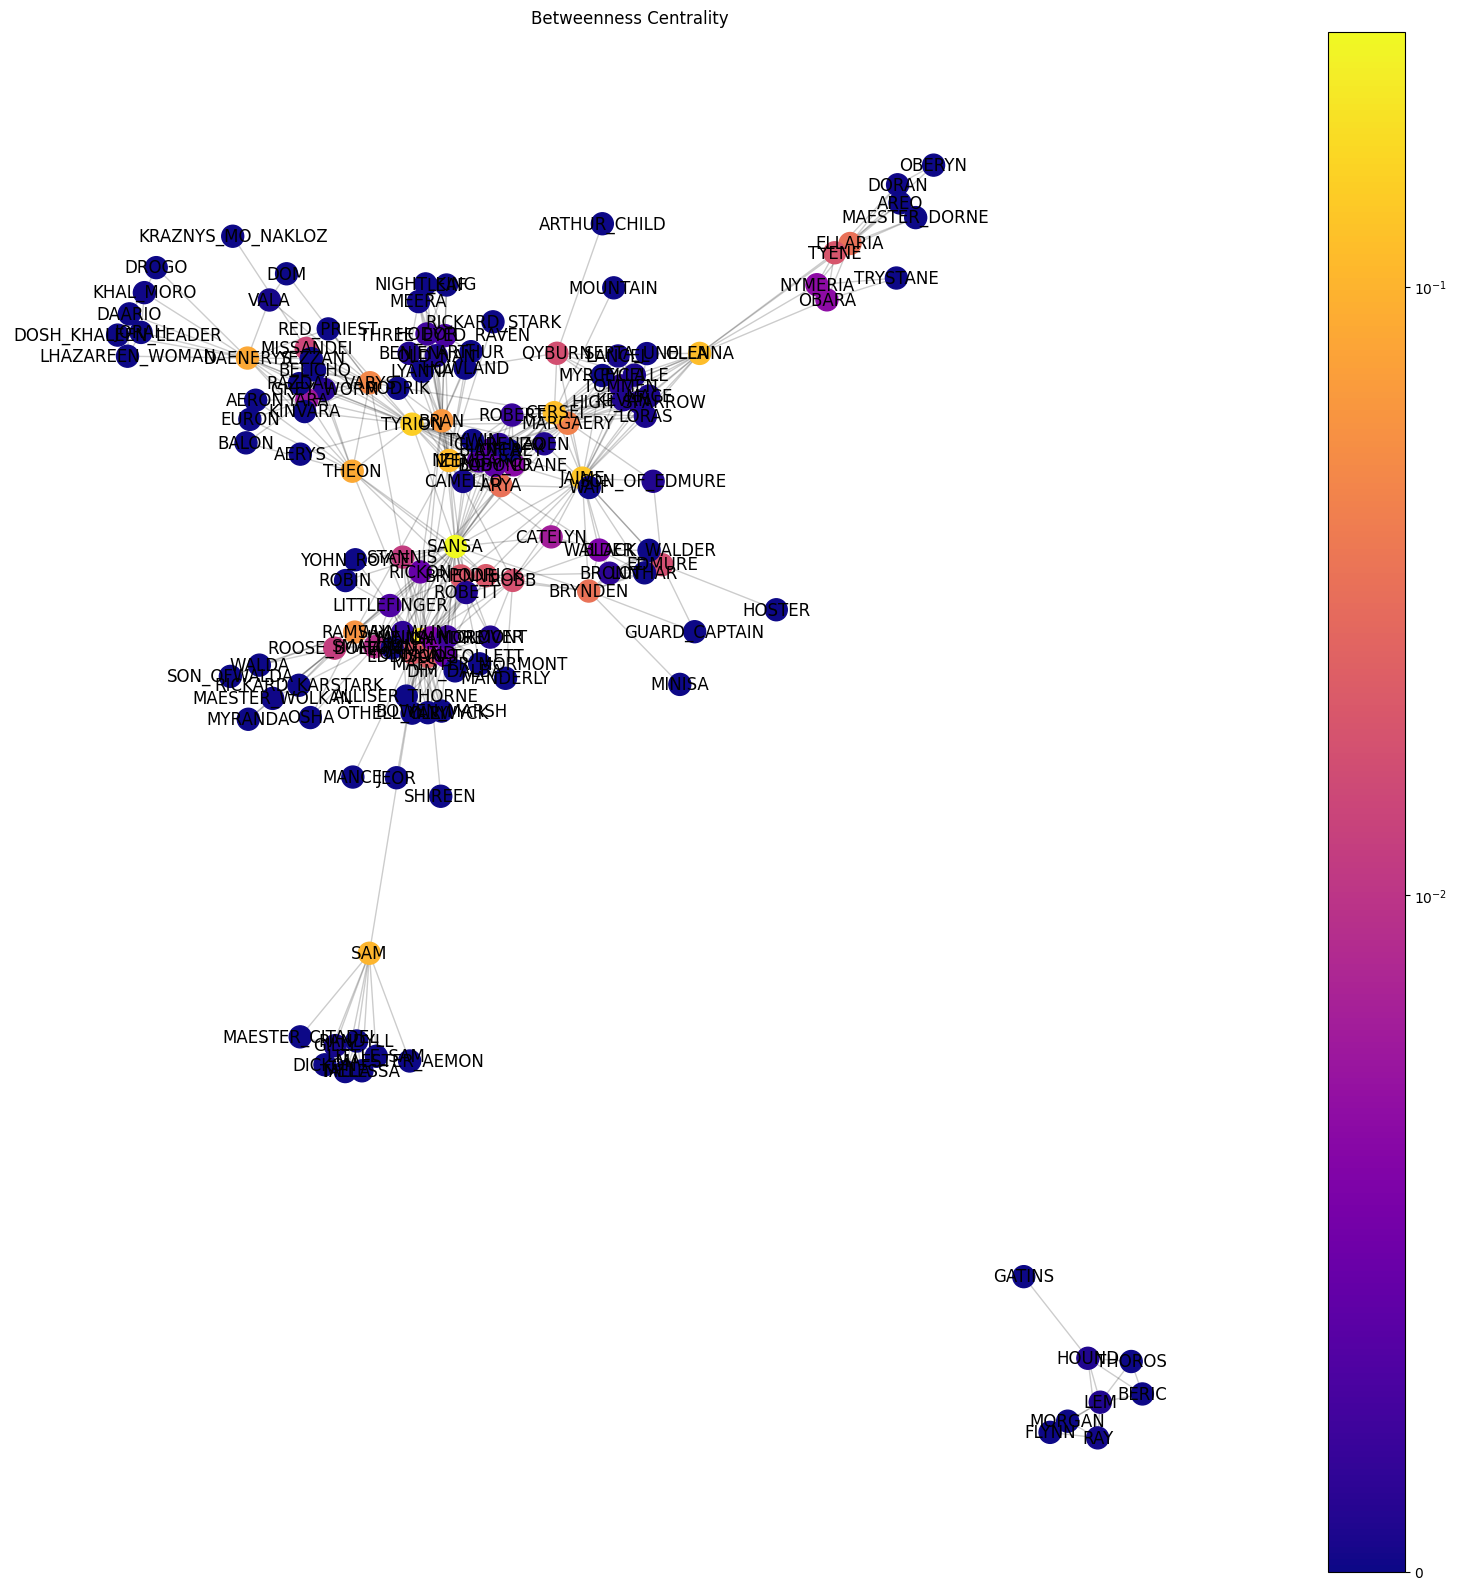

In [15]:
draw_net(g, pos, betweenness, 'Betweenness Centrality') #Betweenness Centrality дүрслэх `draw_net` функцийг дуудах

In [16]:
harmonic = nx.harmonic_centrality(g) # Графын harmonic төвшингийг тооцоолох

In [17]:
#harmonic хэмжүүр дээр үндэслэн зангилаануудыг бууруулан эрэмбэлэх
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 81.41666666666666),
 ('JON', 73.33333333333333),
 ('TYRION', 71.91666666666669),
 ('CERSEI', 70.50000000000004),
 ('JAIME', 69.00000000000004)]

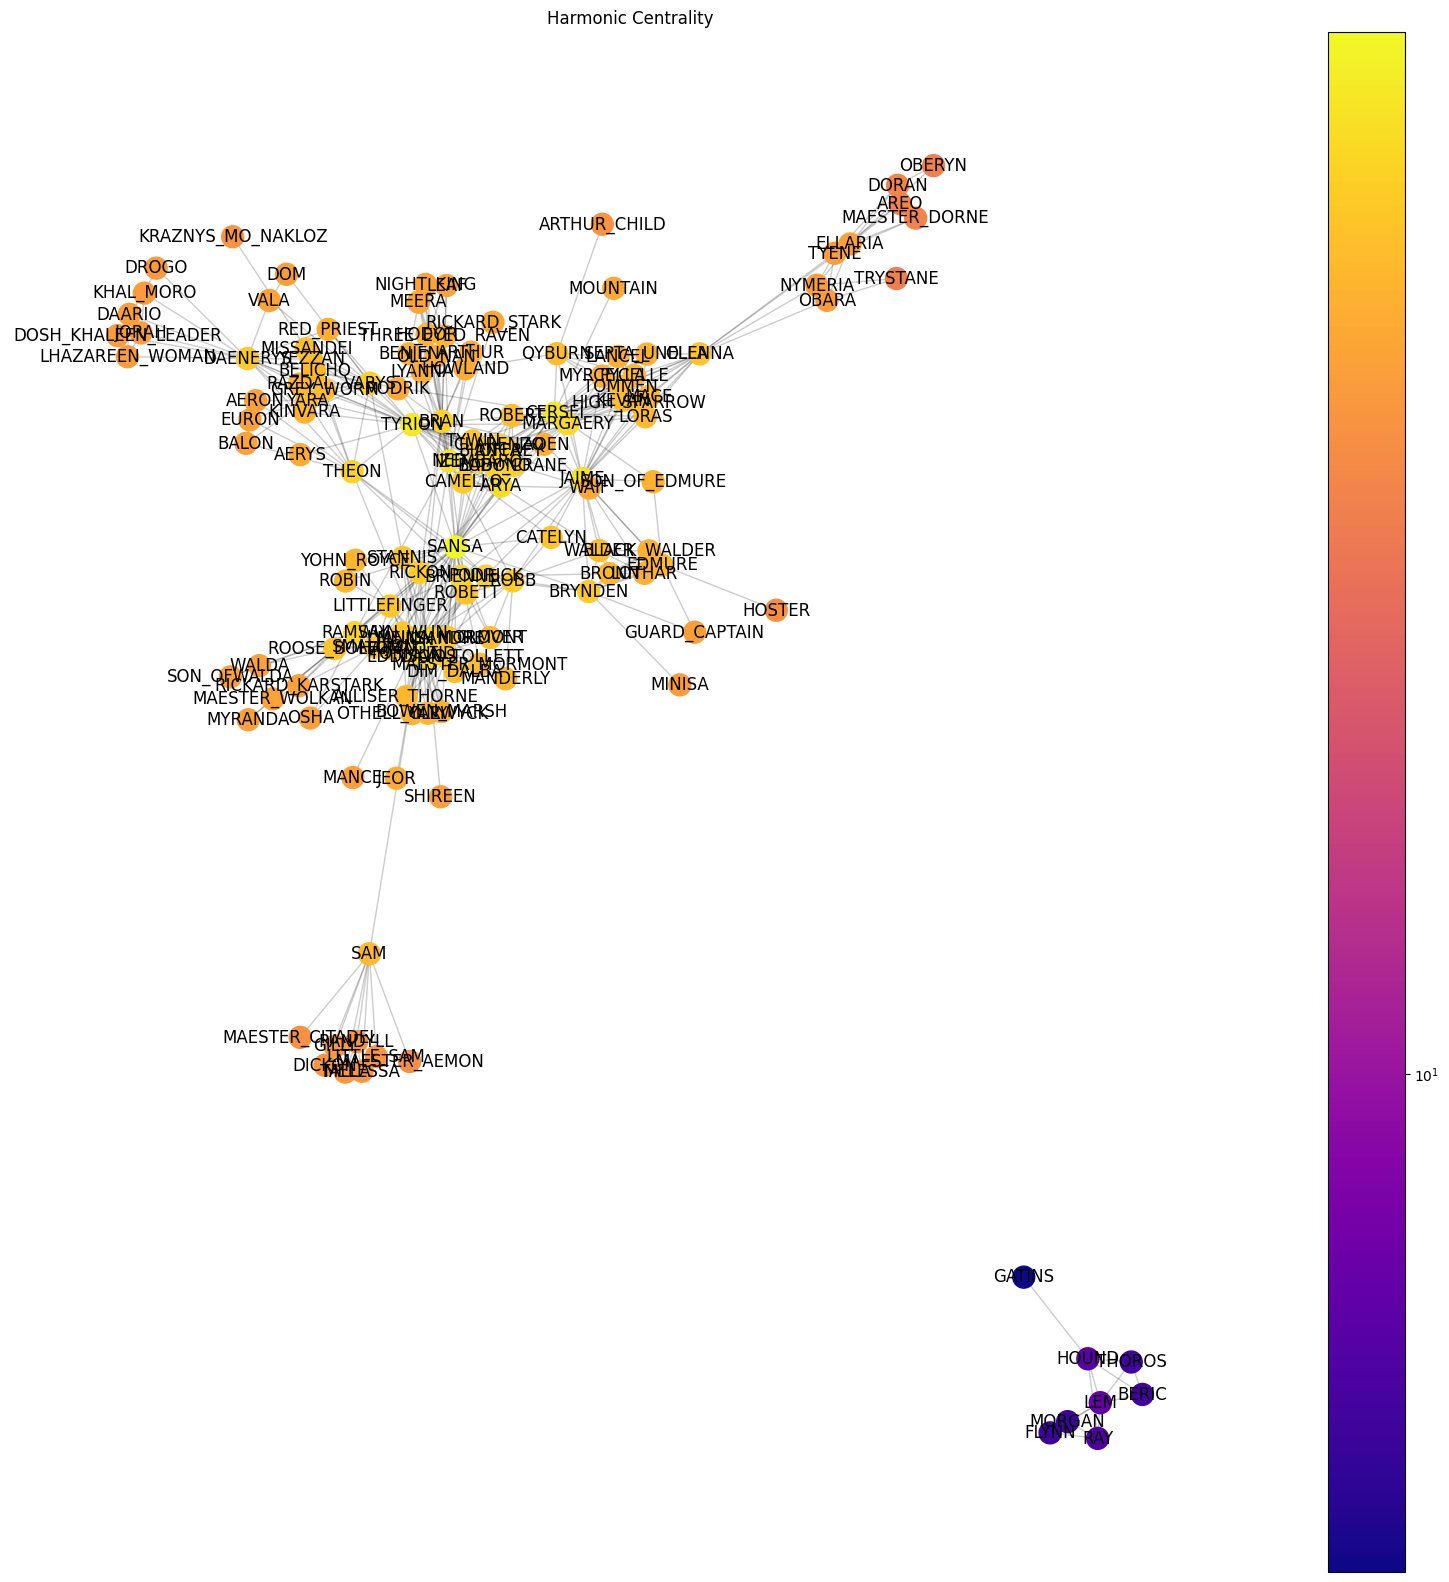

In [18]:
draw_net(g, pos, harmonic, 'Harmonic Centrality') #Harmonic Centrality дүрслэх `draw_net` функцийг дуудах

In [19]:
pagerank = nx.pagerank(g) # PageRank төвшинг тооцоолох

In [20]:
#PageRank хэмжүүр дээр үндэслэн зангилаануудыг бууруулан эрэмбэлэх
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.028391061534083675),
 ('JON', 0.023390907243602793),
 ('CERSEI', 0.020278587723368137),
 ('TYRION', 0.02018889875063729),
 ('JAIME', 0.018551927013827622)]

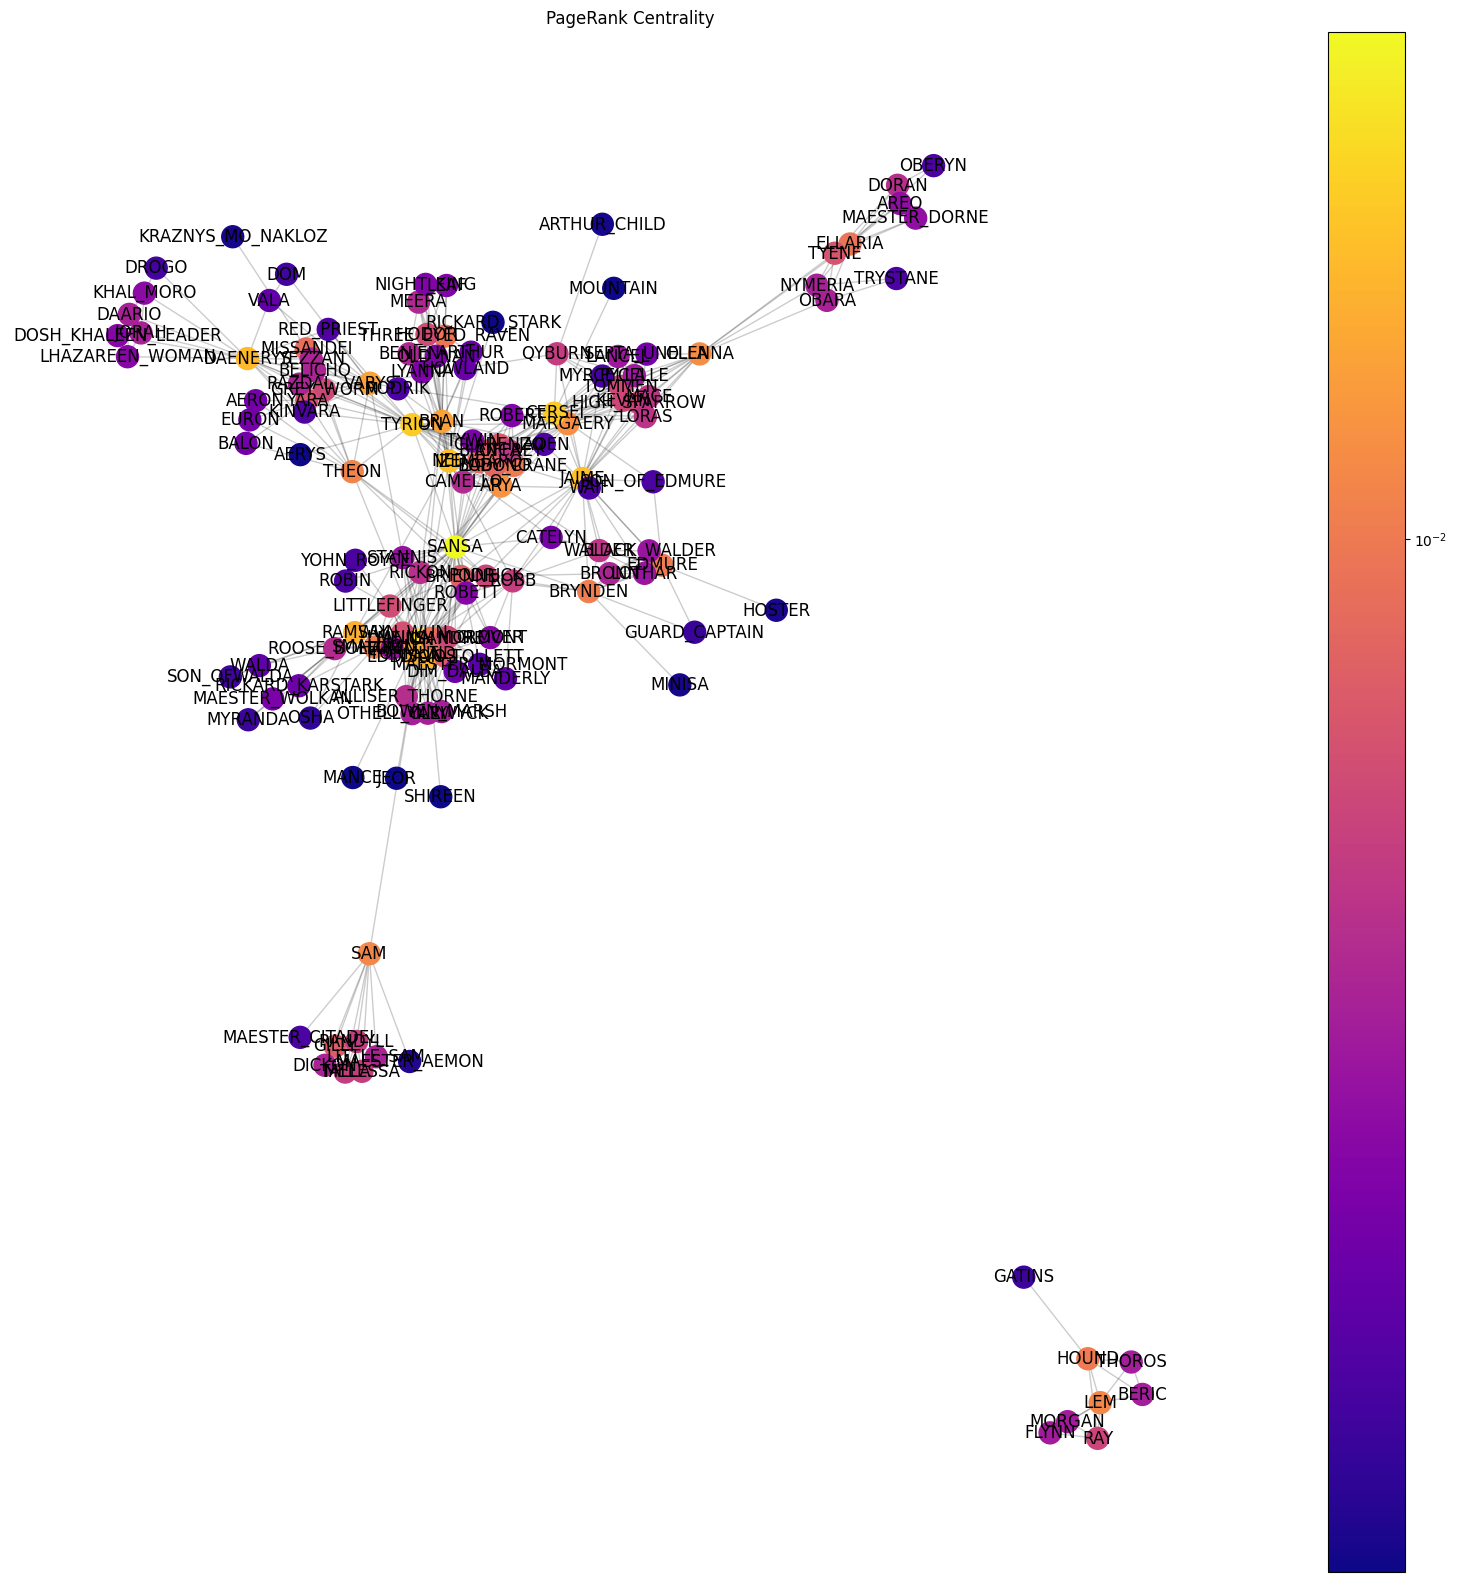

In [21]:
draw_net(g, pos, pagerank, 'PageRank Centrality') #PageRank Centrality дүрслэх `draw_net` функцийг дуудах

In [22]:
eigen = nx.eigenvector_centrality(g) # eigen төвшинг тооцоолох

In [23]:
#Eigen хэмжүүр дээр үндэслэн зангилаануудыг бууруулан эрэмбэлэх
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.3681703250620049),
 ('JON', 0.25752583885620856),
 ('DAVOS', 0.2120919196122236),
 ('TORMUND', 0.20473555675107596),
 ('TYRION', 0.200968439452155)]

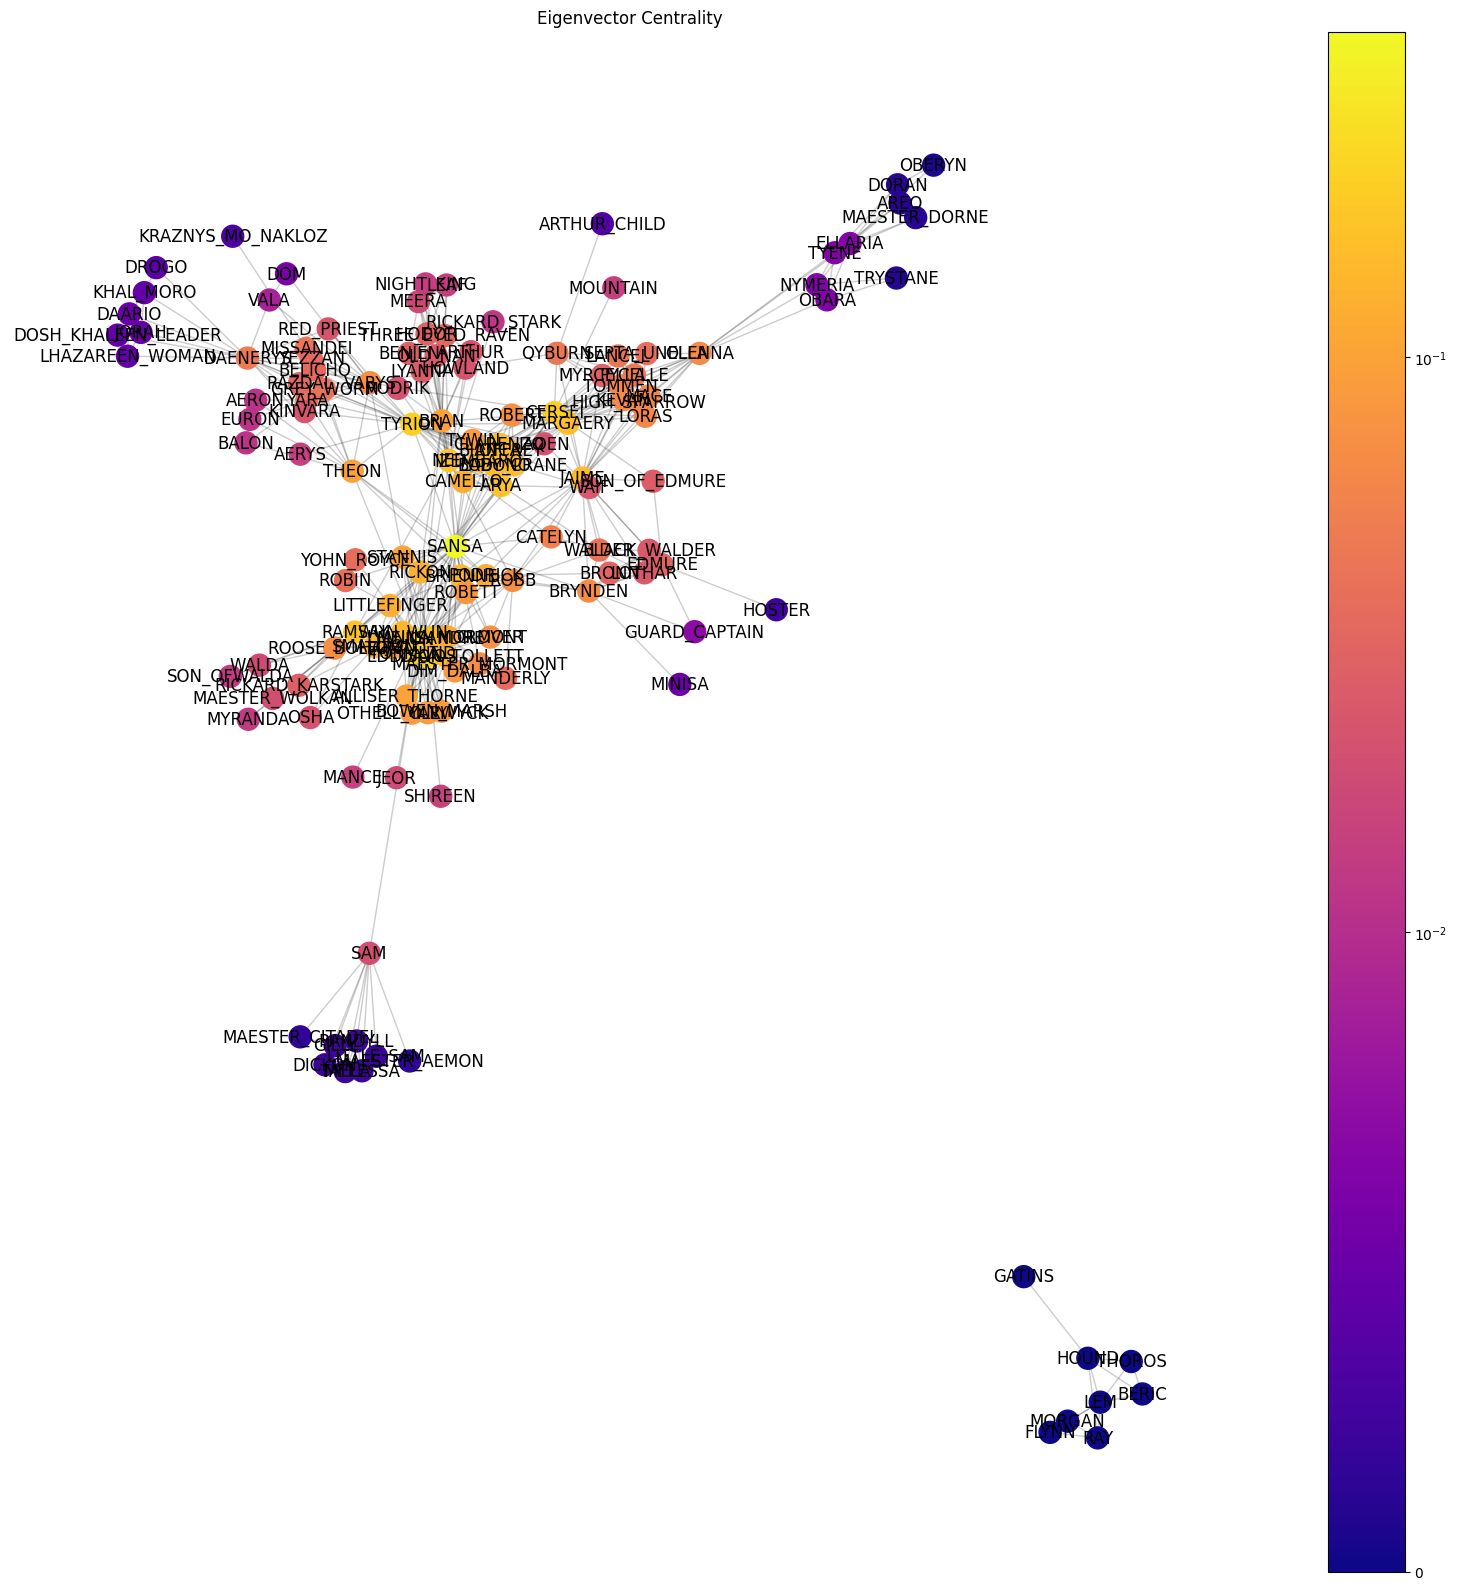

In [24]:
draw_net(g, pos, eigen, 'Eigenvector Centrality') #Eigen Centrality дүрслэх `draw_net` функцийг дуудах

In [45]:
nx.degree_assortativity_coefficient(g) # Degree assortativity coefficient-ийг тооцоолох

-0.006283179316286868

In [46]:
knn = nx.average_degree_connectivity(g) #k зэрэгтэй зангилааны хамгийн ойрын хөршийн дундаж зэргийг тооцоол.
knn = dict(sorted(knn.items()))

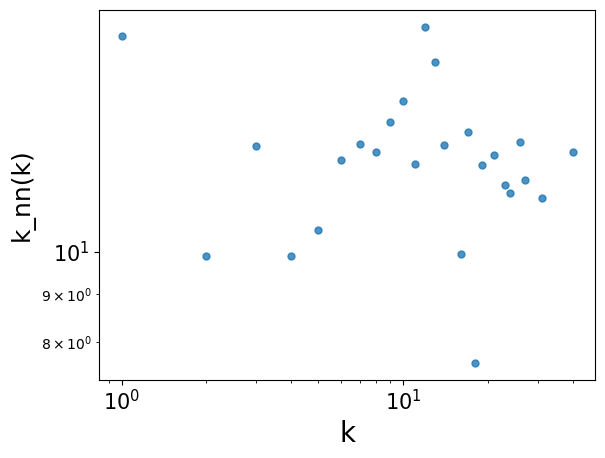

In [47]:
# kNN (k-nearest neighbors) утгуудыг `.`, буюу цэгийн тэмдэглэгээг ашиглан дүрслэх
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)

# Логарифм болон логарифм дээрх график дүрслэл
plt.loglog()  # x болон y тэгшитгэлд логарифм хэрэглэнэ

# X болон Y тагийн нэрийг тодорхойлох
plt.xlabel("k", fontsize=20)  # X таг "k" гэсэн нэртэй бөгөөд размер нь 20
plt.ylabel("k_nn(k)", fontsize=18)  # Y таг "k_nn(k)" гэсэн нэртэй бөгөөд размер нь 18

# X болон Y тагийн хэмжээний фондны хэмжээг тодорхойлох
plt.xticks(fontsize=15)  # X тагийн фондны хэмжээ 15
plt.yticks(fontsize=15)  # Y тагийн фондны хэмжээ 15

# Графикийг дэлгэцэнд харуулах
plt.show()

In [28]:
nx.attribute_assortativity_coefficient(g, 'house') # Аттрибутын асортатив коэффициентийг тооцоолох

0.20747480547396627

In [29]:
h = g.copy() # g графын хуулбарыг h гэсэн хувьсагчид хадгална

In [48]:
#pip багц менежерийг ашиглан шаардлагатай пакетуудыг суулгахад
!pip install --upgrade "pip<24.1"
!pip install node_conformity

DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to sugges

In [49]:
# 1. 'conformity' номын сангийн attribute_conformity функцыг импортлох
from conformity import attribute_conformity

# 2. pandas номын санг импортлох (хүснэгт болон өгөгдлийн бүртгэлтэй ажиллахад ашиглагддаг)
import pandas as pd

# 3. g граф дээрх холбоотой бүрэлдэхүүн хэсгүүдийг олж, хамгийн том хэсгийг авах
gcc = sorted(nx.connected_components(h), key=len, reverse=True)
#   - nx.connected_components(h): g граф дээрх холбоотой бүрэлдэхүүн хэсгүүдийг олно
#   - sorted(..., key=len, reverse=True): эдгээр бүрэлдэхүүн хэсгүүдийг уртаар нь буцааж, хамгийн том хэсгийг эхэнд нь тавина

# 4. h0 нь хамгийн том холбоотой бүрэлдэхүүн хэсэгтэй граф болохоор шинээр үүсгэнэ
h0 = h.subgraph(gcc[0])
#   - h.subgraph(gcc[0]): хамгийн том бүрэлдэхүүн хэсэг болох gcc[0]-ийг аваад, шинэ граф үүсгэнэ

# 5. Хасах хүчин зүйлсийн жагсаалт
alphas = [1.0, 2.0, 3.0, 4.0, 5.0]  # Эдгээр хасах хүчин зүйлс нь аттрибутын нийцтэй байдалд нөлөөлнө

# 6. Аттрибутын нийцтэй байдлыг тооцоолох (энийг хасах хүчин зүйлс болон аттрибутын нэрийг ашиглан тооцоолно)
res = attribute_conformity(h0, alphas, ['house'], profile_size=1)
#   - attribute_conformity(h0, alphas, ['house'], profile_size=1):
#     - h0: хамгийн том холбоотой бүрэлдэхүүн хэсэгтэй граф
#     - alphas: хасах хүчин зүйлсийн жагсаалт
#     - ['house']: "house" аттрибутын нийцтэй байдлыг шалгах
#     - profile_size=1: 1 хувьсагчийн нийцтэй байдлыг шалгана

# 7. Үр дүнг хадгалсан res хувьсагчийг ашиглан нийцтэй байдлын тооцоог гаргах


100%|██████████| 134/134 [00:00<00:00, 182.70it/s]


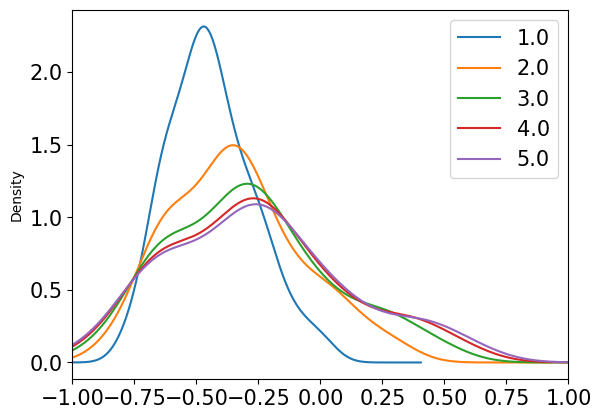

In [50]:
# 1. Фигур болон координатын систем үүсгэх
_, ax = plt.subplots()
#   - plt.subplots(): matplotlib ашиглан нэг субплотыг (график) үүсгэнэ.
#   - ax: энэ нь графикийг зурж харуулах координатын систем юм.

# 2. res хувьсагч дахь өгөгдлүүд дээрх эцсийн циклийг эхлүүлэх
for alpha, profiles in res.items():
    #   - res.items(): 'res' хувьсагчид хадгалагдсан бүх элементийг (alpha, profiles) хосоор нь дамжуулна.
    #   - alpha: хасах хүчин зүйлсийн аль нэг утга.
    #   - profiles: тухайн хасах хүчин зүйлд хамаарах профайл өгөгдөл.

    for profile, data in profiles.items():
        #   - profile: профайлын нэр (зангилааны аттрибутын өгөгдөл).
        #   - data: тухайн профайлын өгөгдлийг агуулсан мэдээлэл.

        # 3. pandas DataFrame үүсгэх, data-гийн утгуудыг график дээр дүрслэх
        df = pd.DataFrame(list(data.values()), columns=[alpha])
        #   - data.values(): тухайн профайлын бүх утгуудыг авах.
        #   - pd.DataFrame(...): эдгээр утгуудыг DataFrame болгож хувиргах.
        #   - columns=[alpha]: DataFrame-ийн баганыг хасах хүчин зүйл болох alpha ашиглан нэрлэх.

        # 4. KDE график зурах (график дээрх түвшингийн дүрслэл)
        df.plot.kde(ax=ax)
        #   - df.plot.kde(ax=ax): DataFrame-ийн **Kernel Density Estimation** (KDE) графикыг зурах.
        #     - KDE нь өгөгдлийн тархалтыг харуулах зорилгоор ашиглагддаг.

# 5. X, Y тагийн хэмжээг тохируулах
plt.xticks(fontsize=15)  # X тагийн font хэмжээг 15-р тохируулна
plt.yticks(fontsize=15)  # Y тагийн font хэмжээг 15-р тохируулна

# 6. X тагийн хүрээг тохируулах
plt.xlim((-1, 1))  # X тагийн хүрээг -1 ба 1 хооронд хязгаарлана

# 7. Legend-г тохируулах
plt.legend(fontsize=15)  # Legend-ийг 15-р font хэмжээтэй харагдуулна

# 8. Графикийг харуулах
plt.show()


In [51]:
# conf_a3 хувьсагчийг '3.0' хасах хүчин зүйлтэй 'house' аттрибутын нийцтэй байдал гэж хадгална
conf_a3 = res['3.0']['house']

In [52]:
# 'conf_a3' доторх бүх элементийг (key, value) хосоор нь сортлох
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]

In [53]:
# node_assortativity жагсаалтын эхний 5 элементийг дамжуулж хэвлэх
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}") # Форматтай хэвлэж байна: node-ийн нэр, нийцтэй байдал, 'house' аттрибут

                JEOR	-0.931038573874242	       Night's Watch
             SHIREEN	-0.9287300518300002	           Baratheon
               GILLY	-0.816164752888596	           Wildlings
        ARTHUR_CHILD	-0.8074085546571529	            Commoner
     MAESTER_CITADEL	-0.778874474317457	             Citadel


In [54]:
# node_assortativity жагсаалтын сүүлийн 5 элементийг буцаан эрэмбэлж хэвлэх
for nd in list(reversed(node_assortativity[-6:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")  #Форматтай хэвлэж байна: node-ийн нэр, нийцтэй байдал, 'house' аттрибут

              LYANNA	0.48983121524161594	               Stark
       RICKARD_STARK	0.44896734570683966	               Stark
         SON_OFWALDA	0.4376999846379132	              Bolton
              BENJEN	0.3502922883738541	               Stark
               WALDA	0.33535527594258246	              Bolton


In [55]:
#node_assortativity жагсаалт дахь бүх (node, assortativity value) хосоос dictionary үүсгэх
na = {c[0]: c[1] for c in node_assortativity}

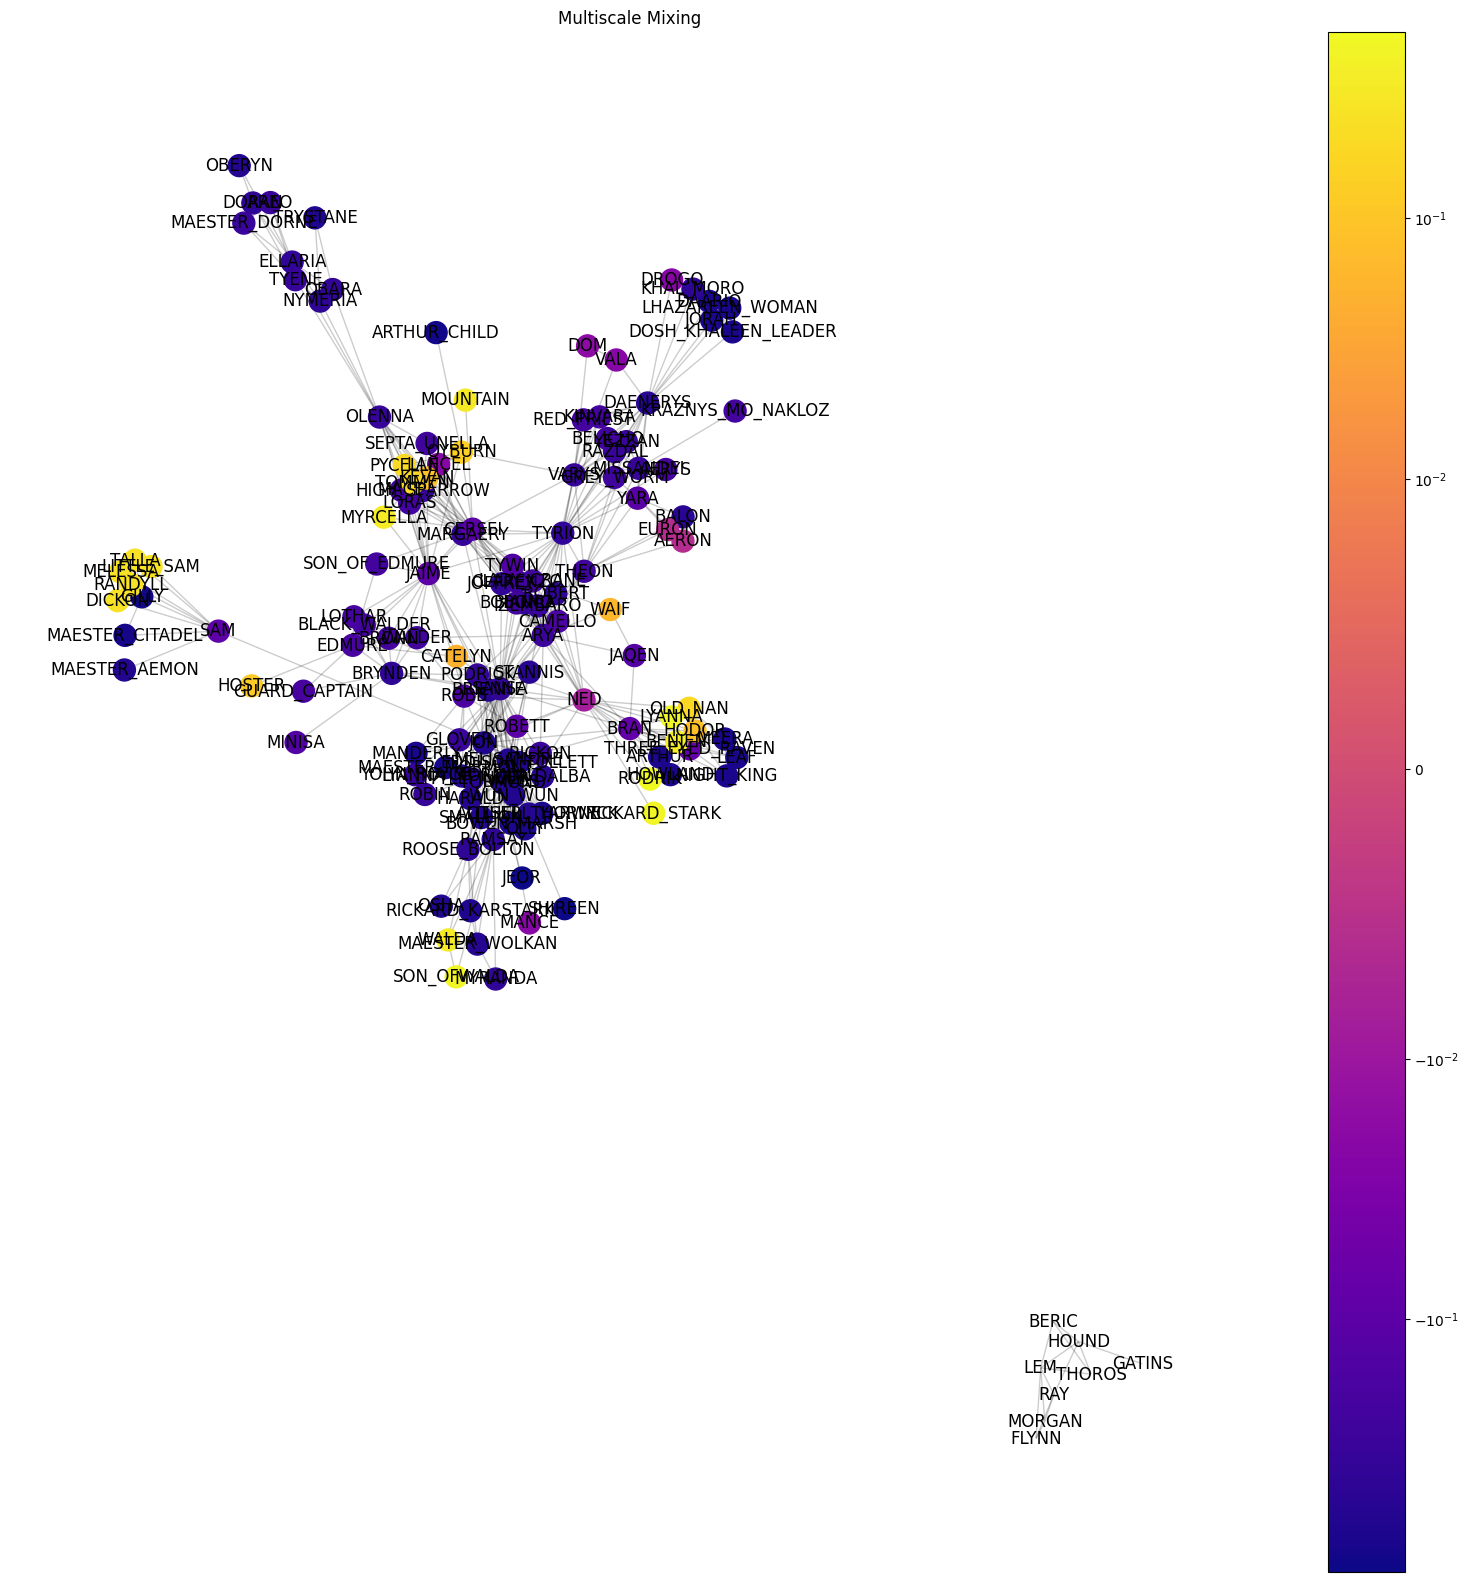

In [56]:
draw_net(h, pos, na, "Multiscale Mixing") #Multiscale Mixing дүрслэх `draw_net` функцийг дуудах

PART2

In [39]:
import networkx as nx
import pandas as pd

# Алхам 1: Чиглэлгүй граф үүсгэх
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
G.add_edges_from(edges)

# Алхам 2: Чиглэлгүй граф дээр Degree Centrality тооцоолох
degree_centrality = nx.degree_centrality(G)

# Чиглэлгүй граф дээрх Degree Centrality-ийг хэвлэх
print("Degree Centrality for Undirected Graph:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

# Алхам 3: Чиглэлтэй граф үүсгэх
DG = nx.DiGraph()
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]
DG.add_edges_from(edges)

# Алхам 4: Чиглэлтэй граф дээр In-degree болон Out-degree Centrality тооцоолох
in_degree_centrality = nx.in_degree_centrality(DG)
out_degree_centrality = nx.out_degree_centrality(DG)

# Чиглэлтэй граф дээрх In-degree Centrality-ийг хэвлэх
print("\nIn-Degree Centrality for Directed Graph:")
for node, centrality in in_degree_centrality.items():
    print(f"Node {node}: {centrality}")

# Чиглэлтэй граф дээрх Out-degree Centrality-ийг хэвлэх
print("\nOut-Degree Centrality for Directed Graph:")
for node, centrality in out_degree_centrality.items():
    print(f"Node {node}: {centrality}")

# Алхам 5: Өгөгдлийн санг ачаалж байна (жишээ нь 'source' ба 'target' багануудтай CSV файл)
df = pd.read_csv("/content/drive/MyDrive/source_target_dataset.csv")  # Жишээ файлын замыг бодит замтай солих

# Алхам 6: Өгөгдлийн сангаас чиглэлтэй граф үүсгэх
G = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())

# Алхам 7: Өгөгдлийн сангаас үүсгэсэн граф дээр Degree Centrality тооцоолох
degree_centrality = nx.degree_centrality(G)

# Алхам 8: Degree Centrality-н үндсэн дээр шилдэг 10 нөлөөлөгчийг олох
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Degree Centrality-н үндсэн дээр шилдэг 10 нөлөөлөгчийг хэвлэх
print("\nTop 10 Influencers based on Degree Centrality:")
for node, centrality in top_influencers:
    print(f"User {node}: {centrality}")

Degree Centrality for Undirected Graph:
Node 1: 0.5
Node 2: 0.75
Node 3: 0.75
Node 4: 0.75
Node 5: 0.25

In-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.25
Node 4: 0.25
Node 5: 0.25

Out-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.5
Node 4: 0.25
Node 5: 0.0

Top 10 Influencers based on Degree Centrality:
User Good morning: 0.25
User Hello: 0.125
User Hi: 0.125
User How are you?: 0.125
User I'm good, thanks!: 0.125
User What's your name?: 0.125
User My name is John.: 0.125
User Goodbye: 0.125
User See you later: 0.125
